# Predicting Food Delivery Time

When was the last time you ordered food online? And how long did it take to reach you?

### Data Fields

Size of training set: 11,094 records

Size of test set: 2,774 records

FEATURES:

<li>Restaurant: A unique ID that represents a restaurant.</li>
<li>Location: The location of the restaurant.</li>
<li>Cuisines: The cuisines offered by the restaurant.</li>
<li>Average_Cost: The average cost for one person/order.</li>
<li>Minimum_Order: The minimum order amount.</li>
<li>Rating: Customer rating for the restaurant.</li>
<li>Votes: The total number of customer votes for the restaurant.</li>
<li>Reviews: The number of customer reviews for the restaurant.</li>
<li>Delivery_Time: The order delivery time of the restaurant. (Target Classes) </li>

## Import Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
#from keras.models import Sequential
#from keras.layers import Dense, Activation
#import keras.backend as K

In [128]:
# read the train and test datasets
train_df = pd.read_excel('./Participants Data/Data_Train.xlsx', sheetname='Sheet1')
print("The train data size : {} ".format(train_df.shape))

test_df = pd.read_excel('./Participants Data/Data_Test.xlsx', sheetname='Sheet1')
print("The test data size : {} ".format(test_df.shape))

The train data size : (11094, 9) 
The test data size : (2774, 8) 


In [129]:
train_df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [130]:
test_df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [131]:
train_df.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


## Data Pre-processing

In [132]:
train_df = train_df[~train_df.Rating.str.contains("Temporarily Closed")]
test_df = test_df[~test_df.Rating.str.contains("Temporarily Closed")]

train_df['Average_Cost'] = train_df['Average_Cost'].str.replace(',', '')
test_df['Average_Cost'] = test_df['Average_Cost'].str.replace(',', '')

train_df['Minimum_Order'] = train_df['Minimum_Order'].str.replace(',', '')
test_df['Minimum_Order'] = test_df['Minimum_Order'].str.replace(',', '')

#### Lets only have records where columns 'Average Cost' and 'Min Order' contain '₹'

In [133]:
train_df = train_df[train_df.Average_Cost.str.contains("₹")]
train_df = train_df[train_df.Minimum_Order.str.contains("₹")]

test_df = test_df[test_df.Average_Cost.str.contains("₹")]
test_df = test_df[test_df.Minimum_Order.str.contains("₹")]

In [134]:
train_df = train_df.reset_index().drop("index", axis = 1)
test_df = test_df.reset_index().drop("index", axis = 1)

#### Remove from '₹' from 'Average Cost' and 'Min Order'

In [135]:
train_df['Average_Cost'] = train_df['Average_Cost'].str.slice(start=1)
test_df['Average_Cost'] = test_df['Average_Cost'].str.slice(start=1)

train_df['Minimum_Order'] = train_df['Minimum_Order'].str.slice(start=1)
test_df['Minimum_Order'] = test_df['Minimum_Order'].str.slice(start=1)

#### Replace '-' and 'NEW' values

In [136]:
# cols = ["Rating","Votes","Reviews"]

# train_df[cols] = train_df[cols].replace({'-':np.nan,'NEW':np.nan,'Opening Soon':np.nan})
# test_df[cols] = test_df[cols].replace({'-':np.nan,'NEW':np.nan,'Opening Soon':np.nan})

In [137]:
train_df['Rating'] = train_df['Rating'].replace('-', '3.7') #2.5
train_df['Rating'] = train_df['Rating'].str.replace('NEW', '3.7') #2.5
train_df['Rating'] = train_df['Rating'].str.replace('Opening Soon', '3.7') #2.5
train_df['Votes'] = train_df['Votes'].replace('-', '4')
train_df['Reviews'] = train_df['Reviews'].replace('-', '2')

test_df['Rating'] = test_df['Rating'].replace('-', '3.7') #2.5
test_df['Rating'] = test_df['Rating'].str.replace('NEW', '3.7') #2.5
test_df['Rating'] = test_df['Rating'].str.replace('Opening Soon', '3.7') #2.5
test_df['Votes'] = test_df['Votes'].replace('-', '4')
test_df['Reviews'] = test_df['Reviews'].replace('-', '2')

#### Convert the Cuisines to one-hot coding

In [141]:
cuisines_list = train_df['Cuisines'].str.split(",").tolist()
cuisines_list = cuisines_list + test_df['Cuisines'].str.split(",").tolist()

new_cuisines_list = []
for owner in cuisines_list:
    new_cuisines_list.append([word.replace(' ', '') for word in owner])

cuisines_list_unique = list(set(sum(new_cuisines_list, [])))

df_lst = []
for i in new_cuisines_list:
    lst = []
    for j in cuisines_list_unique:
        if j in i:
            lst += '1'
        else:
            lst += '0'
    df_lst.append(lst)       

cuis_df = pd.DataFrame(df_lst, columns=cuisines_list_unique)

for col in cuis_df.columns:
    cuis_df[col] = cuis_df[col].astype(int)

train_df = train_df.join(cuis_df[:len(train_df)]) 
test_df = test_df.join(cuis_df[len(train_df):].reset_index().drop("index", axis = 1))

#### Convert location to one-hot coding

In [146]:
location_list = train_df['Location'].tolist()
location_list = location_list + test_df['Location'].tolist()

le = preprocessing.LabelEncoder()

location_list_code = le.fit_transform(location_list)
loc_code_list = list(le.classes_)
loc_code_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

loc_df = pd.DataFrame(location_list_code, columns=['Loc_Code'])
loc_df = pd.get_dummies(loc_df, columns=['Loc_Code'])

for col in loc_df.columns:
    loc_df[col] = loc_df[col].astype(int)

train_df = train_df.join(loc_df[:len(train_df)]) 
test_df = test_df.join(loc_df[len(train_df):].reset_index().drop("index", axis = 1))

#### Drop the Resturant Id column

In [147]:
train_df.drop("Restaurant", axis = 1, inplace = True)
test_df.drop("Restaurant", axis = 1, inplace = True)

train_df.drop("Cuisines", axis = 1, inplace = True)
test_df.drop("Cuisines", axis = 1, inplace = True)

train_df.drop("Location", axis = 1, inplace = True)
test_df.drop("Location", axis = 1, inplace = True)

#### Update the data type of columns

In [148]:
train_df['Average_Cost'] = train_df['Average_Cost'].astype(int)
train_df['Minimum_Order'] = train_df['Minimum_Order'].astype(int)
train_df['Votes'] = train_df['Votes'].astype(int)
train_df['Reviews'] = train_df['Reviews'].astype(int) 
train_df['Rating'] = train_df['Rating'].astype(float)

test_df['Average_Cost'] = test_df['Average_Cost'].astype(int)
test_df['Minimum_Order'] = test_df['Minimum_Order'].astype(int)
test_df['Votes'] = test_df['Votes'].astype(int)
test_df['Reviews'] = test_df['Reviews'].astype(int) 
test_df['Rating'] = test_df['Rating'].astype(float)

### Look for outliners

In [91]:
#train_df_without_nan = train_df[train_df.Rating.notnull() & train_df.Votes.notnull() & train_df.Reviews.notnull()]
#train_df_with_nan = train_df[train_df.Rating.isnull() | train_df.Votes.isnull() | train_df.Reviews.isnull()]

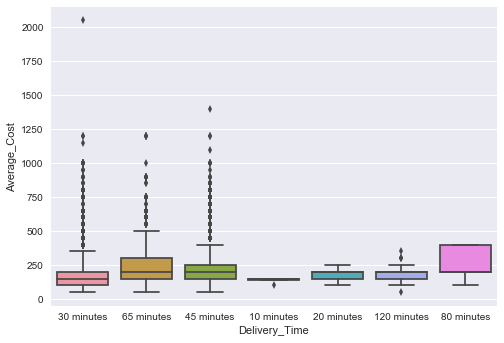

In [93]:
sns.boxplot(x='Delivery_Time', y='Average_Cost', data=train_df)
sns.plt.show()

In [94]:
train_df = train_df[train_df['Average_Cost'] < 1000]

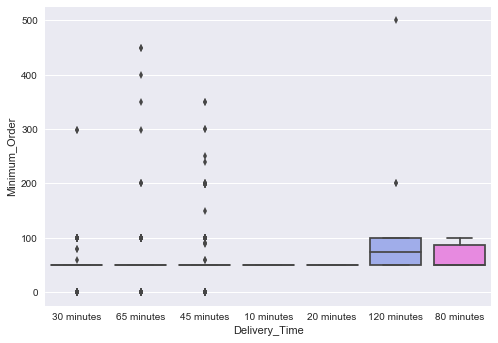

In [95]:
sns.boxplot(x='Delivery_Time', y='Minimum_Order', data=train_df)
sns.plt.show()

In [96]:
train_df = train_df[(train_df['Minimum_Order'] < 200)]

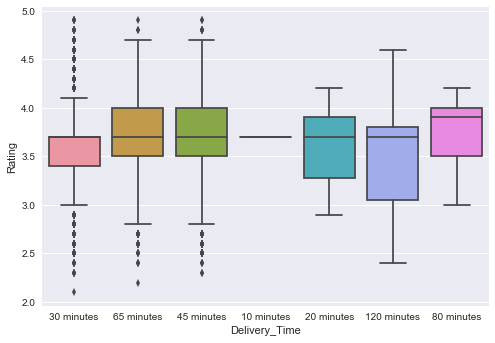

In [97]:
sns.boxplot(x='Delivery_Time', y='Rating', data=train_df)
sns.plt.show()

In [98]:
train_df = train_df[(train_df['Rating'] < 4.75)]

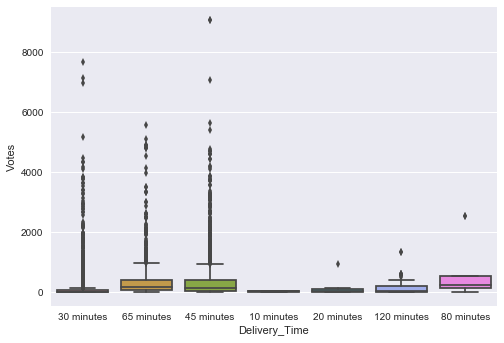

In [99]:
sns.boxplot(x='Delivery_Time', y='Votes', data=train_df)
sns.plt.show()

In [100]:
train_df = train_df[train_df['Votes'] < 4000]
train_df.shape

(10989, 9)

In [ ]:
train_df1 = train_df[(train_df['Delivery_Time'] == '30 minutes') & (train_df['Votes'] < 150)]
train_df2 = train_df[(train_df['Delivery_Time'] == '65 minutes') & (train_df['Votes'] < 625)]
train_df3 = train_df[(train_df['Delivery_Time'] == '45 minutes') & (train_df['Votes'] < 650)]
train_df4 = train_df[(train_df['Delivery_Time'] == '120 minutes') & (train_df['Votes'] < 450)]
train_df5 = train_df[(train_df['Delivery_Time'] == '10 minutes') | (train_df['Delivery_Time'] == '20 minutes') | (train_df['Delivery_Time'] == '80 minutes')]

In [ ]:
train_df = train_df1.copy()
train_df = train_df1.append(train_df2, ignore_index = True)
train_df = train_df.append(train_df3, ignore_index = True)
train_df = train_df.append(train_df4, ignore_index = True)
train_df = train_df.append(train_df5, ignore_index = True)
train_df.shape

In [29]:
train_df = train_df[train_df['Votes'] < 600]
train_df.shape

(9818, 9)

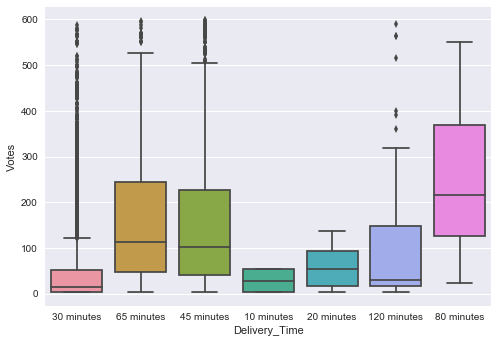

In [30]:
sns.boxplot(x='Delivery_Time', y='Votes', data=train_df)
sns.plt.show()

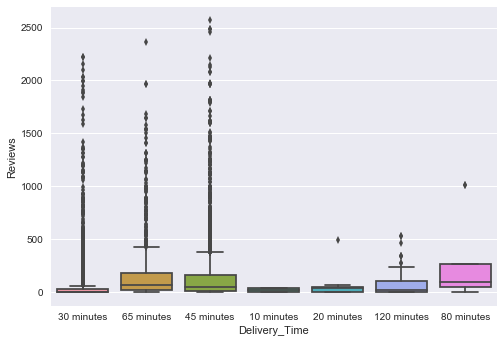

In [101]:
sns.boxplot(x='Delivery_Time', y='Reviews', data=train_df)
sns.plt.show()

In [102]:
train_df = train_df[train_df['Reviews'] < 2000]
train_df.shape

(10973, 9)

In [ ]:
train_df1 = train_df[(train_df['Delivery_Time'] == '30 minutes') & (train_df['Reviews'] < 50)]
train_df2 = train_df[(train_df['Delivery_Time'] == '65 minutes') & (train_df['Reviews'] < 225)]
train_df3 = train_df[(train_df['Delivery_Time'] == '45 minutes') & (train_df['Reviews'] < 200)]
train_df4 = train_df[(train_df['Delivery_Time'] == '120 minutes') & (train_df['Reviews'] < 100)]
train_df5 = train_df[(train_df['Delivery_Time'] == '10 minutes') | (train_df['Delivery_Time'] == '20 minutes') | (train_df['Delivery_Time'] == '80 minutes')]

In [ ]:
train_df = train_df1.copy()
train_df = train_df1.append(train_df2, ignore_index = True)
train_df = train_df.append(train_df3, ignore_index = True)
train_df = train_df.append(train_df4, ignore_index = True)
train_df = train_df.append(train_df5, ignore_index = True)
train_df.shape

In [ ]:
sns.boxplot(x='Delivery_Time', y='Reviews', data=train_df)
sns.plt.show()

In [103]:
train_df = train_df.reset_index().drop("index", axis = 1)

#### Cuisine Count

In [105]:
# cuisines_list = train_df['Cuisines'].str.split(",").tolist()
# cuisines_list = cuisines_list + test_df['Cuisines'].str.split(",").tolist()

# new_cuisines_list = []
# for owner in cuisines_list:
#     new_cuisines_list.append([word.replace(' ', '') for word in owner])

# df_lst = []
# for i in new_cuisines_list:
#     df_lst.append(len(i)) 

# cuis_df = pd.DataFrame(df_lst, columns=['Cuisines_Count'])

# train_df = train_df.join(cuis_df[:len(train_df)]) 
# test_df = test_df.join(cuis_df[len(train_df):].reset_index().drop("index", axis = 1))

#### Splitting location to area and city

In [110]:
# location_list = train_df['Location'].str.split(",").tolist()
# location_list = location_list + test_df['Location'].str.split(",").tolist()

# new_location_list = []
# for owner in location_list:
#     new_location_list.append([word.replace(' ', '') for word in owner])

# city_area_list = []
# for owner in new_location_list:
#     lst = []
#     lst.append(owner.pop())
#     if len(owner) > 0:
#         lst.append(owner.pop())
#     else:
#         lst.append('Other')
#     city_area_list.append(lst) 

# loc_df = pd.DataFrame(city_area_list, columns=['Loc_Level1','Loc_Level2'])
# #loc_df = pd.DataFrame(city_area_list, columns=['Loc_Level1'])

# loc_df = pd.get_dummies(loc_df, columns=['Loc_Level1'])
# loc_df = pd.get_dummies(loc_df, columns=['Loc_Level2'])

# train_df = train_df.join(loc_df[:len(train_df)]) 
# test_df = test_df.join(loc_df[len(train_df):].reset_index().drop("index", axis = 1))



#### Drop the Resturant Id column

In [111]:
train_df.drop("Restaurant", axis = 1, inplace = True)
test_df.drop("Restaurant", axis = 1, inplace = True)

In [112]:
train_df.drop("Cuisines", axis = 1, inplace = True)
test_df.drop("Cuisines", axis = 1, inplace = True)

train_df.drop("Location", axis = 1, inplace = True)
test_df.drop("Location", axis = 1, inplace = True)

## Handling Missing Values

In [ ]:
train_df.head()

In [ ]:
train_df.tail()

In [ ]:
test_df.head()

In [ ]:
test_df.tail()

## Post Processing

#### Normalizing

In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler()

# train_df_imp[['Average_Cost','Cuisines_Count','Loc_Level1_code','Loc_Level2_code','Minimum_Order','Rating','Reviews','Votes']] = min_max_scaler.fit_transform(train_df_imp[['Average_Cost_code','Cuisines_Count','Loc_Level1_code','Loc_Level2_code','Minimum_Order_code','Rating','Reviews','Votes']])
# test_df_imp[['Average_Cost','Cuisines_Count','Loc_Level1_code','Loc_Level2_code','Minimum_Order','Rating','Reviews','Votes']] = min_max_scaler.transform(test_df_imp[['Average_Cost_code','Cuisines_Count','Loc_Level1_code','Loc_Level2_code','Minimum_Order_code','Rating','Reviews','Votes']])

## Model Ready Data

In [150]:
train_df.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,NorthIndian,SouthAmerican,French,Mexican,...,Loc_Code_25,Loc_Code_26,Loc_Code_27,Loc_Code_28,Loc_Code_29,Loc_Code_30,Loc_Code_31,Loc_Code_32,Loc_Code_33,Loc_Code_34
0,200,50,3.5,12,4,30 minutes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100,50,3.5,11,4,30 minutes,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,150,50,3.6,99,30,65 minutes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250,99,3.7,176,95,30 minutes,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,200,99,3.2,521,235,65 minutes,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [151]:
train_df.tail()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,NorthIndian,SouthAmerican,French,Mexican,...,Loc_Code_25,Loc_Code_26,Loc_Code_27,Loc_Code_28,Loc_Code_29,Loc_Code_30,Loc_Code_31,Loc_Code_32,Loc_Code_33,Loc_Code_34
11086,250,50,4.2,326,189,30 minutes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11087,100,50,3.6,36,16,30 minutes,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11088,100,50,3.5,45,18,30 minutes,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11089,100,50,3.1,24,9,30 minutes,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11090,100,50,3.7,4,2,30 minutes,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [152]:
train_df.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Delivery_Time', 'NorthIndian', 'SouthAmerican', 'French', 'Mexican',
       ...
       'Loc_Code_25', 'Loc_Code_26', 'Loc_Code_27', 'Loc_Code_28',
       'Loc_Code_29', 'Loc_Code_30', 'Loc_Code_31', 'Loc_Code_32',
       'Loc_Code_33', 'Loc_Code_34'],
      dtype='object', length=142)

In [153]:
#X = train_df[cols + ['Rating'] + ['Location_code']]
X = train_df.loc[:, train_df.columns != 'Delivery_Time']
#X = train_df[['Average_Cost', 'Cuisines_Count', 'Loc_Level1_code','Loc_Level2_code', 'Minimum_Order', 'Rating', 'Reviews', 'Votes']]
y = train_df[["Delivery_Time"]]

In [154]:
X.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,NorthIndian,SouthAmerican,French,Mexican,Assamese,...,Loc_Code_25,Loc_Code_26,Loc_Code_27,Loc_Code_28,Loc_Code_29,Loc_Code_30,Loc_Code_31,Loc_Code_32,Loc_Code_33,Loc_Code_34
0,200,50,3.5,12,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100,50,3.5,11,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,150,50,3.6,99,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250,99,3.7,176,95,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,200,99,3.2,521,235,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [155]:
#yd = pd.get_dummies(y, columns=['Delivery_Time'])

In [156]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 10) 

# Build Model

#### Decision Tree

In [72]:
dtree_model = DecisionTreeClassifier(max_depth = 35).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
#cm = confusion_matrix(y_test, dtree_predictions) 
#print(cm)

In [73]:
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

0.715315315315


In [69]:
#dtree_predictions_test = dtree_model.predict(test_df) 

In [ ]:
#dtree_predictions_test

In [ ]:
#df_result = pd.DataFrame(dtree_predictions_test, columns= ['Delivery_Time'])
#df_result.to_excel(r'result.xlsx', index = None)

### Random Forest

In [161]:
# Fitting Random Forest Classification to the Training set
#classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 50)
classifier = RandomForestClassifier(n_estimators = 1500, 
                                    random_state = 9, 
                                    max_features=100, 
                                    bootstrap = True,
                                    #max_depth = 5, 
                                    min_samples_split = 3,  
                                    min_samples_leaf = 1
                                   )
classifier.fit(X_train, y_train)

/Users/Pramod/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x224e91908>>
Traceback (most recent call last):
  File "/Users/Pramod/anaconda/lib/python3.6/site-packages/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=1, oob_score=False, random_state=9,
            verbose=0, warm_start=False)

In [162]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [163]:
print(accuracy_score(y_test, y_pred))

0.793693693694


In [92]:
# list of column names from original data
cols = X_train.columns
# feature importances from random forest fit rf
rank = classifier.feature_importances_
# form dictionary of feature ranks and features
features_dict = dict(zip(np.argsort(rank),cols))

In [93]:
features_dict

{0: 'Loc_Code_31',
 1: 'Loc_Code_30',
 2: 'Loc_Code_32',
 3: 'Loc_Code_34',
 4: 'Loc_Code_33',
 5: 'Loc_Code_27',
 6: 'Sandwich',
 7: 'African',
 8: 'Portuguese',
 9: 'Rating',
 10: 'Belgian',
 11: 'Thai',
 12: 'Iranian',
 13: 'Seafood',
 14: 'Average_Cost',
 15: 'Steak',
 16: 'Bangladeshi',
 17: 'RawMeats',
 18: 'Konkan',
 19: 'Coffee',
 20: 'Wraps',
 21: 'Italian',
 22: 'Loc_Code_5',
 23: 'Mediterranean',
 24: 'Turkish',
 25: 'ModernIndian',
 26: 'SriLankan',
 27: 'Parsi',
 28: 'Reviews',
 29: 'Loc_Code_22',
 30: 'Rajasthani',
 31: 'FingerFood',
 32: 'Loc_Code_4',
 33: 'Andhra',
 34: 'Lucknowi',
 35: 'RoastChicken',
 36: 'SouthAmerican',
 37: 'Chettinad',
 38: 'Kebab',
 39: 'Loc_Code_14',
 40: 'BubbleTea',
 41: 'Kashmiri',
 42: 'Loc_Code_29',
 43: 'Maharashtrian',
 44: 'Loc_Code_10',
 45: 'Japanese',
 46: 'Salad',
 47: 'American',
 48: 'Korean',
 49: 'Mangalorean',
 50: 'Awadhi',
 51: 'Cafe',
 52: 'SouthIndian',
 53: 'Tea',
 54: 'MiddleEastern',
 55: 'Minimum_Order',
 56: 'Loc_Code_2

In [100]:
classifier.fit(X, y)

/Users/Pramod/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=1, oob_score=False, random_state=9,
            verbose=0, warm_start=False)

In [101]:
#y_pred = classifier.predict(X)
#print(accuracy_score(y, y_pred))

In [102]:
rf_predictions = classifier.predict(test_df) 

In [103]:
df_result = pd.DataFrame(rf_predictions, columns= ['Delivery_Time'])
df_result.to_excel(r'result.xlsx', index = None)

### XGBoost

In [168]:
modelxgb = XGBClassifier(random_state=5,
                         learning_rate=0.05,
                         n_estimators=750,
                        reg_lambda=0.5,
                        max_depth = 25)
modelxgb.fit(X_train, y_train)
modelxgb.score(X_test,y_test)

/Users/Pramod/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Pramod/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79729729729729726

In [ ]:
modelxgb = XGBClassifier(random_state=9,
                         learning_rate=0.1,
                         n_estimators=750,
                         reg_lambda=0.075,
                         max_depth = 33,
                         objective = 'multi:softmax',
                         n_class=7,
                         seed=27)

modelxgb.fit(X_train, y_train)
modelxgb.score(X_test,y_test)

In [ ]:
modelxgb = XGBClassifier(random_state=9,
                         learning_rate=0.1,
                         n_estimators=750,
                        reg_lambda=0.075,
                        max_depth = 33,
                        objective = 'multi:softmax',
                        n_class=7,
                        seed=27)
modelxgb.fit(X, y)

In [ ]:
xg_predictions = modelxgb.predict(test_df) 

df_result = pd.DataFrame(xg_predictions, columns= ['Delivery_Time'])
df_result.to_excel(r'result.xlsx', index = None)